# Assignment 1: Image Manipulation and Edge Detection

---

Prof. Dr.-Ing. Antje Muntzinger, Hochschule für Technik Stuttgart

antje.muntzinger@hft-stuttgart.de

---

In this notebook, we practice some basic image manipulation techniques in OpenCV including Canny edge detection. These are the foundation of later computer vision applications.

**NOTE:** You may answer in English or German.

In [2]:
# imports
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np 
import cv2

Task 1: Basic Image Manipulation in OpenCV
=

**TODO**: 1a) Load the image 'HFT_Bau1.jpg'. Convert it to a color format of your choice, and display it. **(1.5 points)**

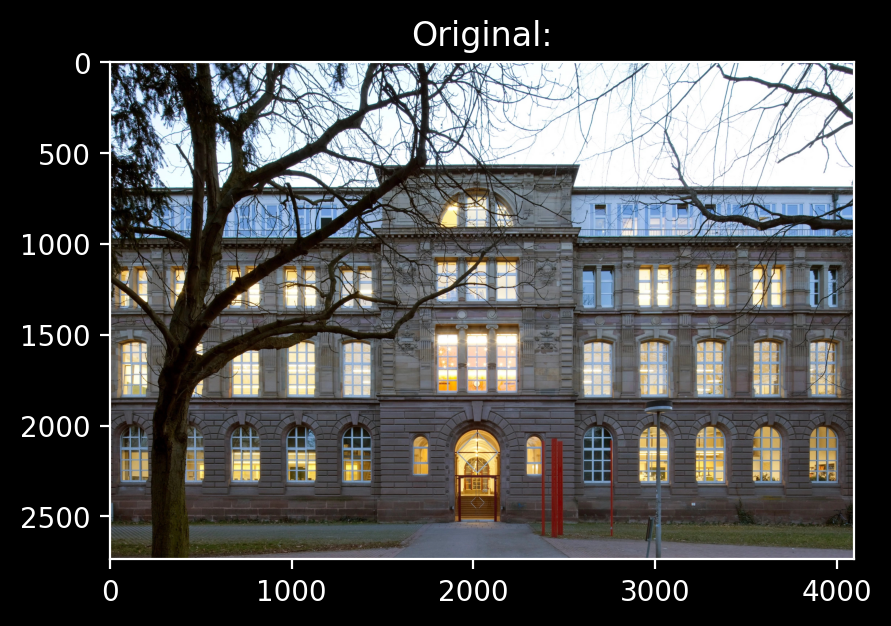

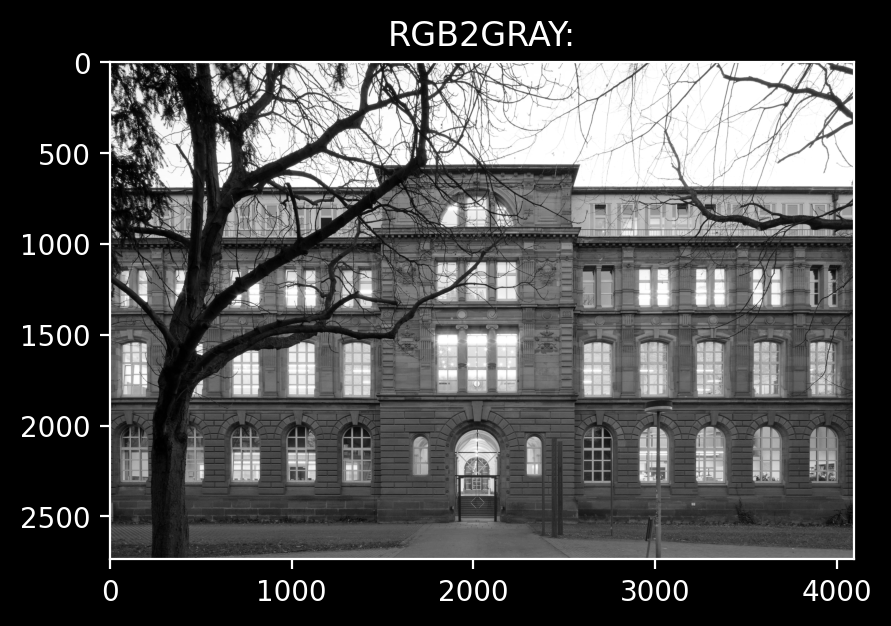

In [3]:
##### TODO: YOUR CODE GOES HERE
import matplotlib.image as mpimg

# Read in the image
image = mpimg.imread('images/HFT_Bau1.jpg')

plt.imshow(image)
plt.title("Original:")
plt.show()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title("RGB2GRAY:")
plt.show()

**TODO**: 1b) Color the 10th pixel row of the image in red. Plot the upper left 500x500 pixel image cutout to verify your result. **(2 points)** 

Hint: Indexing starts at 0 in Python! Remember the image origin is in the upper left image corner.

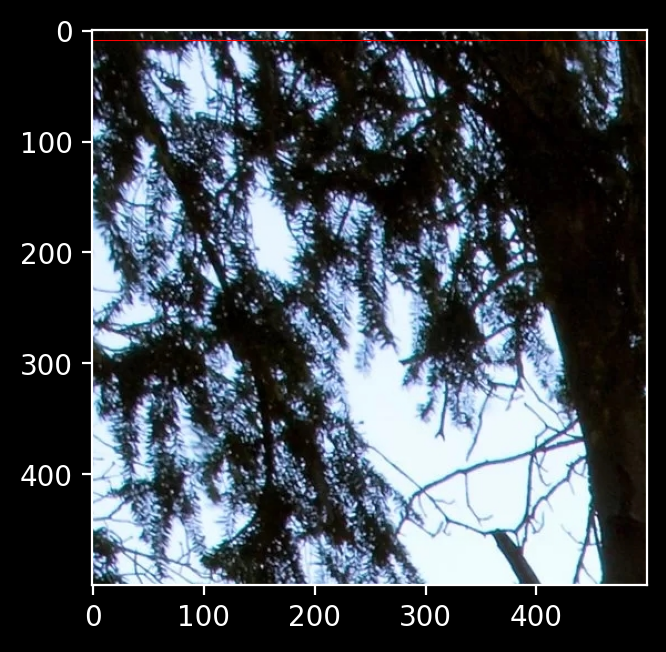

In [4]:
##### TODO: YOUR CODE GOES HERE
image_copy = image.copy()

# using array replacement
#image_copy[9] =  np.full((image_copy.shape[1], 3), (255, 0, 0))
# using line
image_copy = cv2.line(image_copy, (0,9), (image_copy.shape[1]-1,9), color=(255, 0, 0), thickness=1 )
plt.imshow(image_copy[:500, :500])

**TODO**: 1c) Print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row. **(2 points)** 

In [5]:
##### TODO: YOUR CODE GOES HERE

right_pixel_row9 = image_copy[8, -1]
print("Rightmost pixel in 9th row:", right_pixel_row9)
left_pixel_row10 = image_copy[9, 0]
print("Leftmost pixel in 10th row:", left_pixel_row10)

Rightmost pixel in 9th row: [ 90 162 184]
Leftmost pixel in 10th row: [255   0   0]


**TODO**: 1d) Flatten the color image, i.e., convert it from the 3D array to a 1D array. Find at least two different commands that achieve the desired result. Check your output with `shape`. **(3 points)**

In [6]:
##### TODO: YOUR CODE GOES HERE

# using reshape
img_reshape = image_copy.reshape(-1)
print("Shape of flatten image using .reshape:", img_reshape.shape)

# using flatten
img_flatten = image_copy.flatten()
print("Shape of flatten image using .flatten:", img_flatten.shape )

Shape of flatten image using .reshape: (33583104,)
Shape of flatten image using .flatten: (33583104,)


**TODO**: 1e) As before, print the color values of the rightmost Pixel in the 9th row, as well as the color values of the leftmost Pixel in the 10th row, but use the flattened image now. Verify that the result is the same as before. **(2 points)**

In [7]:
##### TODO: YOUR CODE GOES HERE

# index of rightmost pixel row 9: first pixel in 10th line minus 1; all muliplied by 3 since flatten 1D array uses the color channels in a row ([R, G, B, R, G, B,...])
index_right_pixel_row9_flat = (9*image_copy.shape[1]-1)*3

right_pixel_row9_flat = img_flatten[index_right_pixel_row9_flat : index_right_pixel_row9_flat+3]
print("Rightmost pixel in 9th row of respahed image:", right_pixel_row9_flat)

# index of leftmost pixel in row 10
index_left_pixel_row10_flat = (9*image_copy.shape[1]-0)*3

left_pixel_row10_flat = img_flatten[index_left_pixel_row10_flat : index_left_pixel_row10_flat+3]
print("Leftmost pixel in 10th row:", left_pixel_row10_flat)


Rightmost pixel in 9th row of respahed image: [ 90 162 184]
Leftmost pixel in 10th row: [255   0   0]


**TODO**: 1f) Split the three color channels and display them separately. Can you see from the plotted images which color channel is displayed in which image (without looking at the code), or do the three channels not differ much? Write your answer in the markdown cell below the code. **(2 points)**

(-0.5, 4095.5, 2732.5, -0.5)

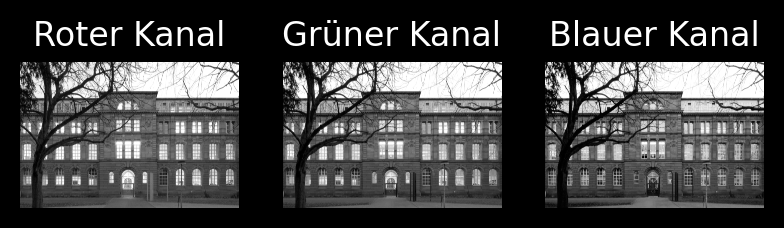

In [8]:
##### TODO: YOUR CODE GOES HERE

img_R, img_G, img_B = cv2.split(image)
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.imshow(img_R, cmap='gray')
ax1.set_title("Roter Kanal")
ax1.axis("off")
ax2.imshow(img_G, cmap='gray')
ax2.set_title("Grüner Kanal")
ax2.axis("off")
ax3.imshow(img_B, cmap='gray')
ax3.set_title("Blauer Kanal")
ax3.axis("off")

**YOUR ANSWER**: 

Die Rote Infotafel rechts vor dem Eingang ist deutlich im roten Kanal zu erkennen (heller = Farbe vorhanden).

Den blauen und grünen Kanal kann ich nicht gut unterscheiden.

Task 2: Edge Detection
=

**TODO**: 2a) Choose a part of the image that you find interesting for later corner and edge detection. Store the cutout in a new grayscale image. **(1 point)**

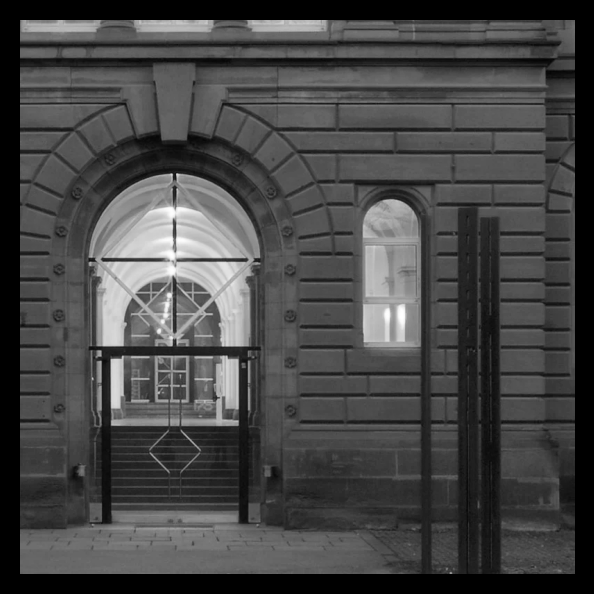

In [9]:
##### TODO: YOUR CODE GOES HERE

# Beispiel: Ausschnitt vom Eingang mit Infotafel
cutout_color = image[1800:2600, 1800:2600]

# In Graustufen umwandeln
cutout_gray = cv2.cvtColor(cutout_color, cv2.COLOR_BGR2GRAY)
plt.imshow(cutout_gray, cmap='gray')
plt.axis('off')
plt.show()

**TODO**: 2b) Find a part of the cutout that you think might be difficult to detect edges in with Canny. Mark this part in the grayscale cutout with a red rectangle. Write a short explanation why this could be difficult below. **(2 points)**

Hint: Note that you cannot plot color into a grayscale image. One option is to convert the grayscale image to RGB first, using `COLOR_GRAY2RGB`.

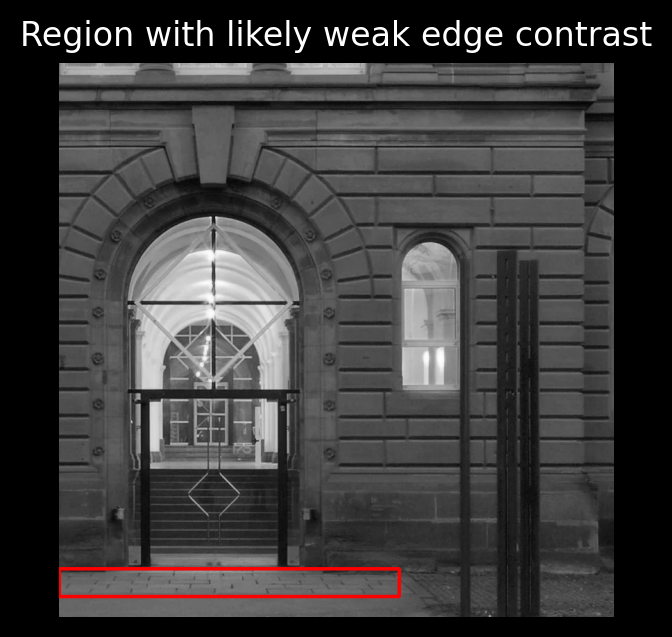

In [10]:
##### TODO: YOUR CODE GOES HERE

# convert gray to RGB to enable the red rectangle
cutout_rgb = cv2.cvtColor(cutout_gray, cv2.COLOR_GRAY2RGB)

# coordinates of the rectangle
top_left = (0, 730)
bottom_right = (490, 770)

# draw the rectangle
cv2.rectangle(cutout_rgb, top_left, bottom_right, color=(255, 0, 0), thickness=3)

# Plot
plt.imshow(cutout_rgb)
plt.title("Region with likely weak edge contrast")
plt.axis('off')
plt.show()


**YOUR ANSWER**: 

The edges within the window are probably difficult to detect since all the colors of the stones are close to the color of the edges.

**TODO**: 2c) Resize the gray cutout to 1/4th of the original size, keeping the aspect ratio. Plot both grayscale images next to each other using Matplotlib's `subplots`. **(2 points)**

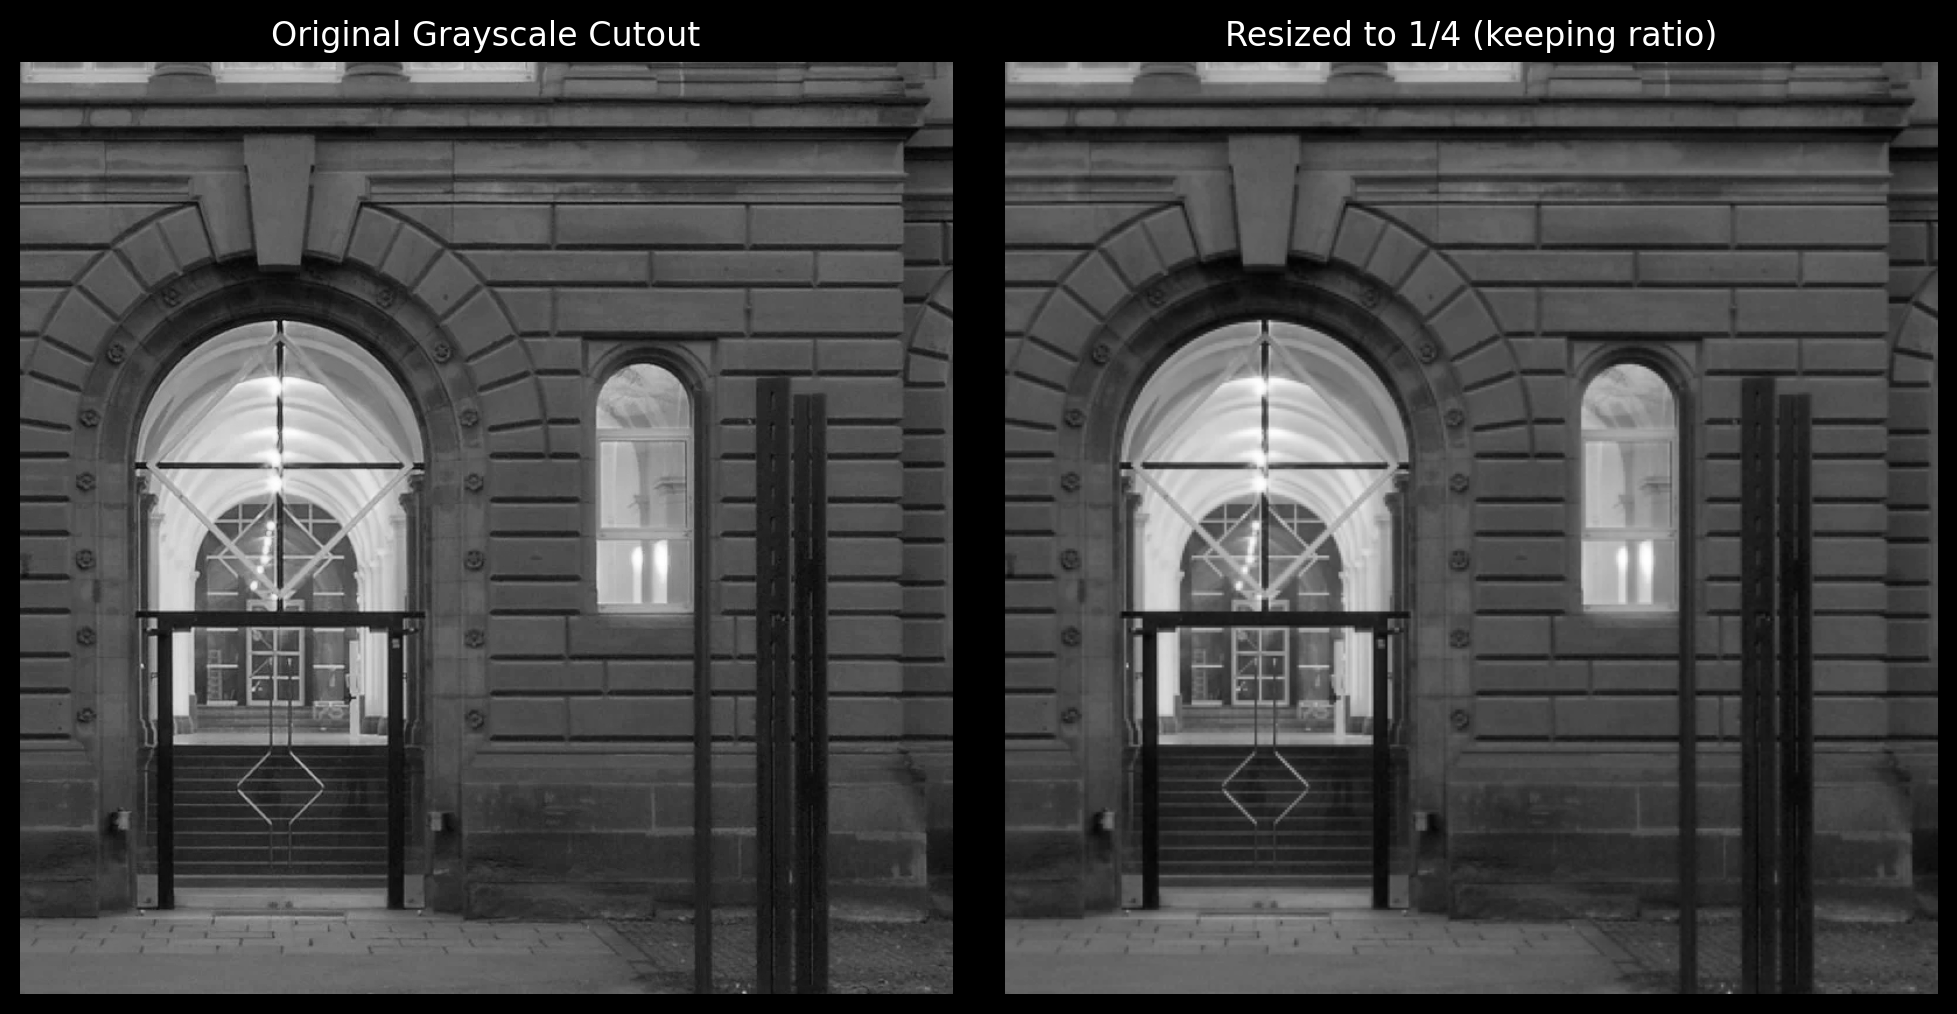

In [11]:
##### TODO: YOUR CODE GOES HERE

# Größe des Originals
original_height, original_width = cutout_gray.shape

# Neue Größe: 1/4 der Fläche = halbe Breite und halbe Höhe
resized_gray = cv2.resize(cutout_gray, (original_width // 2, original_height // 2), interpolation=cv2.INTER_AREA)

# Plot: beide nebeneinander anzeigen
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cutout_gray, cmap='gray')
axes[0].set_title("Original Grayscale Cutout")
axes[0].axis('off')

axes[1].imshow(resized_gray, cmap='gray')
axes[1].set_title("Resized to 1/4 (keeping ratio)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

**TODO**: 2d) Apply Gaussian blur with a kernel of size 9 to the resized image and plot the result. **(1 point)**

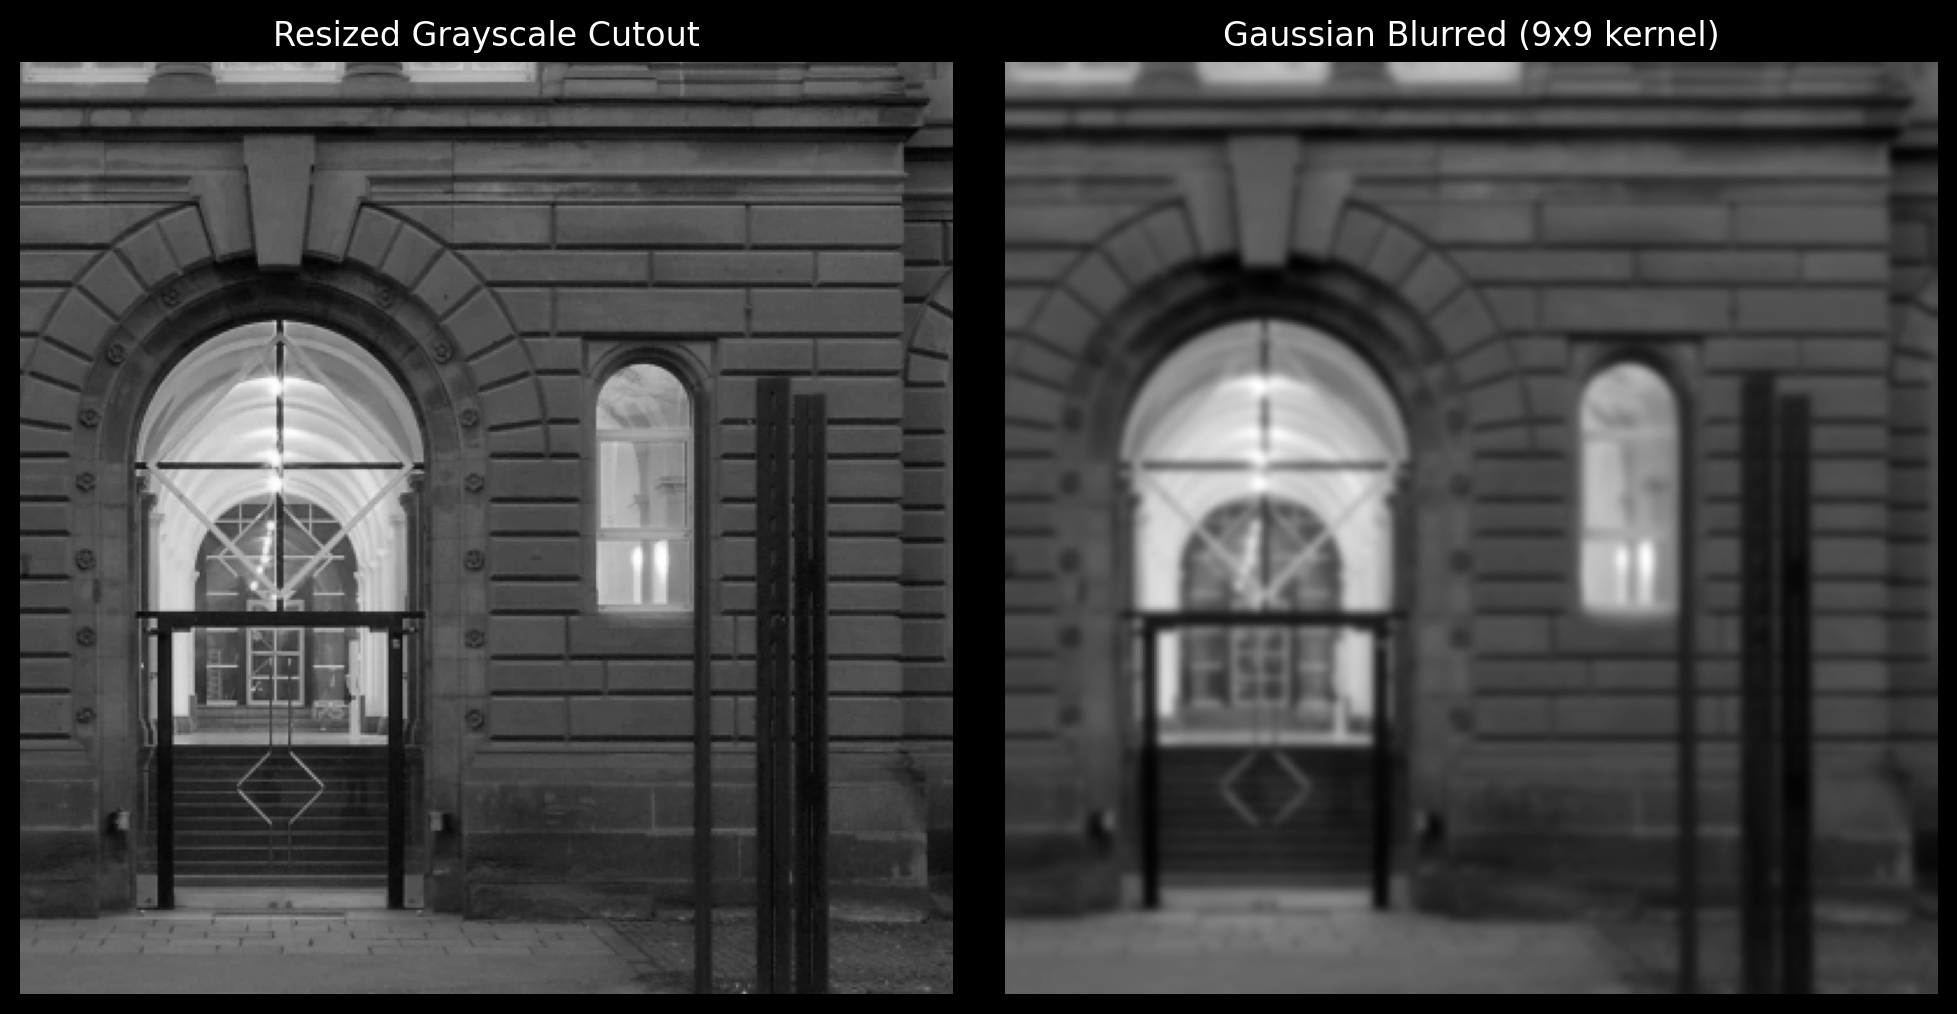

In [12]:
##### TODO: YOUR CODE GOES HERE

# Gaussian Blur auf das verkleinerte Bild anwenden
blurred = cv2.GaussianBlur(resized_gray, ksize=(9, 9), sigmaX=0)

# Plot: Original (resized) und geblurrt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(resized_gray, cmap='gray')
axes[0].set_title("Resized Grayscale Cutout")
axes[0].axis('off')

axes[1].imshow(blurred, cmap='gray')
axes[1].set_title("Gaussian Blurred (9x9 kernel)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

**TODO**: 2e) Detect the edges in the blurred cutout using Canny edge detector. Adapt the Canny thresholds for an optimal result. Plot the edges in blue into the grayscale cutout. **(3 points)** 

In [1]:
##### TODO: YOUR CODE GOES HERE

# 1. Canny Edge Detection mit angepassten Thresholds
edges = cv2.Canny(blurred, threshold1=25, threshold2=60)

# 2. Graustufenbild in RGB konvertieren, um farbig einzeichnen zu können
gray_rgb = cv2.cvtColor(resized_gray, cv2.COLOR_GRAY2RGB)

# 3. Kanten als blaue Pixel (RGB: 0, 0, 255) ins Bild zeichnen
# Maske: dort wo edge == 255, setze Blaukanal auf 255
gray_rgb[edges == 255] = [0, 0, 255]  # Blau

# 4. Plot anzeigen
plt.imshow(gray_rgb)
plt.title("Canny Edges in Blue on Grayscale Cutout")
plt.axis('off')
plt.show()

interactive(children=(IntText(value=50, description='Threshold 1:'), IntText(value=150, description='Threshold…

**TODO**: 2f) Check if your prediction of difficulty was correct. Do you see a) real edges that were missed by Canny (false negatives) or b) detected edges that are not there in reality (false positives)? Try to experiment with the Canny thresholds and solve these difficulties. How did you try to solve the difficulties? Write your answer below the code. **(1.5 points)**

**YOUR ANSWER**: 

Well done, you are now able to apply basic image manipulation techniques as well as Canny edge detection to images in OpenCV! 

Task 3: Theory Questions
=

**TODO**: 3a) What is the problem of applying image derivatives for edge detection in noisy images? What is a possible solution to that problem? Can you give an example in which you often get noise when taking a photo? **(3 points)**

**YOUR ANSWER**: 

**TODO**: 3b) You are given a 3×3 pixel input image $
\begin{array}{|ccc|}
\hline
 1 & 2 & 1  \\ 
 2 & 2 & 2  \\ 
 3 & 2 & 3  \\ 
\hline   
\end{array}$
and a 3×3 pixel filter $\begin{array}{|ccc|}
\hline
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
 -1 & 0 & 1  \\ 
\hline   
\end{array}$. Compute the 3 × 3 pixel result image of the correlation of the filter with the input image. All pixels outside the input image are padded with zeros. **(4.5 points)**

**YOUR ANSWER**: 


**TODO**: 3c) What patterns does this special filter respond to? How can you see this in the result from 3b)? **(2 points)**

**YOUR ANSWER**: 

**TODO**: 3d) Please calculate the result using the settings from task 3b), but with convolution instead of correlation. **(4.5 points)**

**YOUR ANSWER**: 
